In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib inline
import seaborn as sns



In [20]:
df=pd.read_csv("supermarket_sales - Sheet1.csv")

In [23]:
df.shape #rows and column

(1000, 17)

In [25]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


# Data cleaning


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [27]:
pd.isnull(df)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [28]:
pd.isnull(df).sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [63]:
df['Gross income']=df['Gross income'].astype(int)

In [62]:
df['Gross income'].dtypes

dtype('int64')

In [65]:
df['Unit price']=df['Unit price'].astype(int)
df['Unit price'].dtypes

dtype('int64')

In [42]:
df.columns
df=df.drop(['cogs','Tax 5%'],axis=1) #dropping cogs and tax5% column
df.shape

(1000, 15)

In [77]:
df.rename(columns={'gross income':'Gross income'}, inplace=True)  #to save it we have to use inplace

In [76]:
df.describe()

,Unit price,Quantity,Total,gross margin percentage,Gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,55.163000,5.510000,322.966749,4.761905,14.861000,6.97270
std,26.481082,2.923431,245.885335,0.000000,11.713534,1.71858
min,10.000000,1.000000,10.678500,4.761905,0.000000,4.00000
25%,32.000000,3.000000,124.422375,4.761905,5.000000,5.50000
50%,55.000000,5.000000,253.848000,4.761905,12.000000,7.00000
75%,77.000000,8.000000,471.350250,4.761905,22.000000,8.50000
max,99.000000,10.000000,1042.650000,4.761905,49.000000,10.00000


In [75]:
df[['Unit price','Gross income','Rating']].describe()

,Unit price,Gross income,Rating
count,1000.000000,1000.000000,1000.00000
mean,55.163000,14.861000,6.97270
std,26.481082,11.713534,1.71858
min,10.000000,0.000000,4.00000
25%,32.000000,5.000000,5.50000
50%,55.000000,12.000000,7.00000
75%,77.000000,22.000000,8.50000
max,99.000000,49.000000,10.00000


# Exploratory Data Analysis

In [72]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Total', 'Date', 'Time',
       'Payment', 'gross margin percentage', 'Gross income', 'Rating'],
      dtype='object')

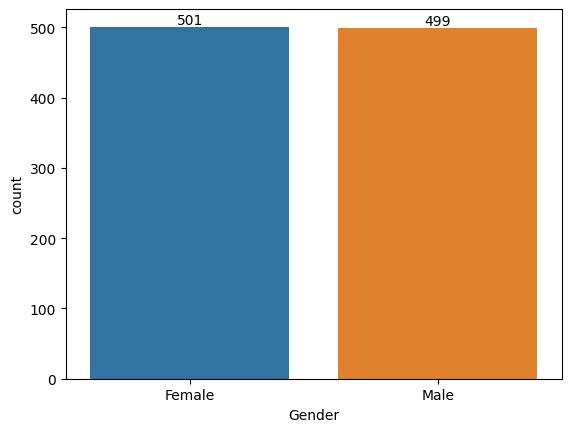

In [73]:
ax=sns.countplot(x='Gender',data =df)

for bars in ax.containers:
    ax.bar_label(bars)

In [89]:
df.groupby(['Gender'],as_index=False)['Unit price'].sum().sort_values(by='Unit price',ascending=False)


,Gender,Unit price
1,Male,27724
0,Female,27439


<Axes: xlabel='Gender', ylabel='Unit price'>

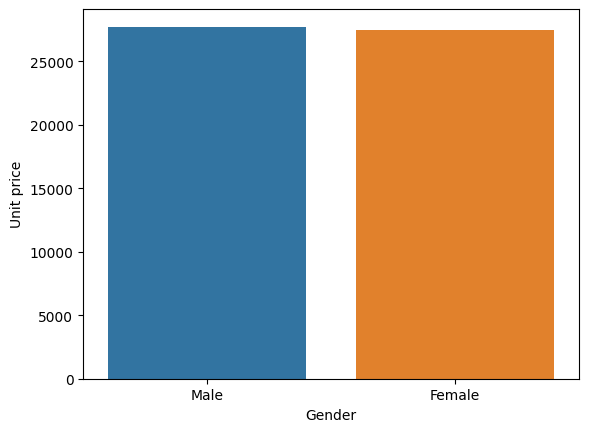

In [92]:
sales_info=df.groupby(['Gender'], as_index=False)['Unit price'].sum().sort_values(by='Unit price',ascending=False)

sns.barplot(x='Gender',y='Unit price',data=sales_info)

### From the above bar graphs we can conclude that both male and female are having almost same share of buying capacitya and having equivalent purchasing power

## City

In [93]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Total', 'Date', 'Time',
       'Payment', 'gross margin percentage', 'Gross income', 'Rating'],
      dtype='object')

<Axes: xlabel='City', ylabel='Gross income'>

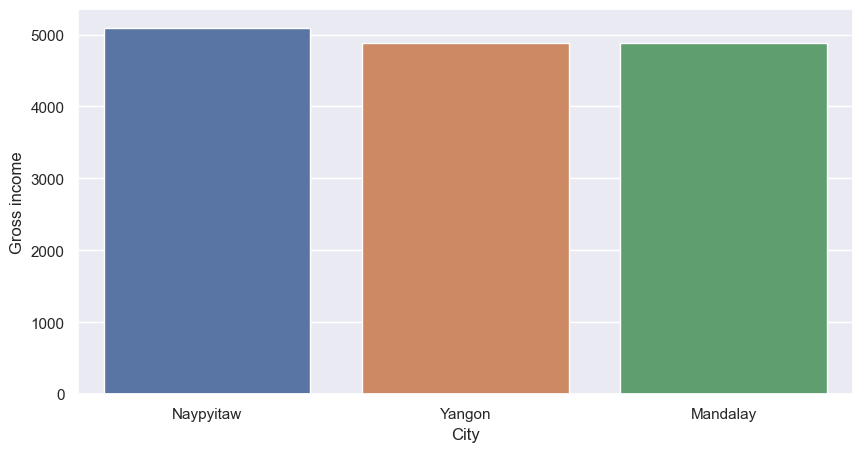

In [108]:
sales_state=df.groupby(['City'], as_index=False)['Gross income'].sum().sort_values(by='Gross income',ascending=False)
# sns.set(rc={'figure.figsize':(10,5)})  #for more nu. of cities
sns.barplot(x='City',y='Gross income',data=sales_state)

### So,conclusion is Naypyitaw had the most gross income for sales in all 3 cities


# Customer type

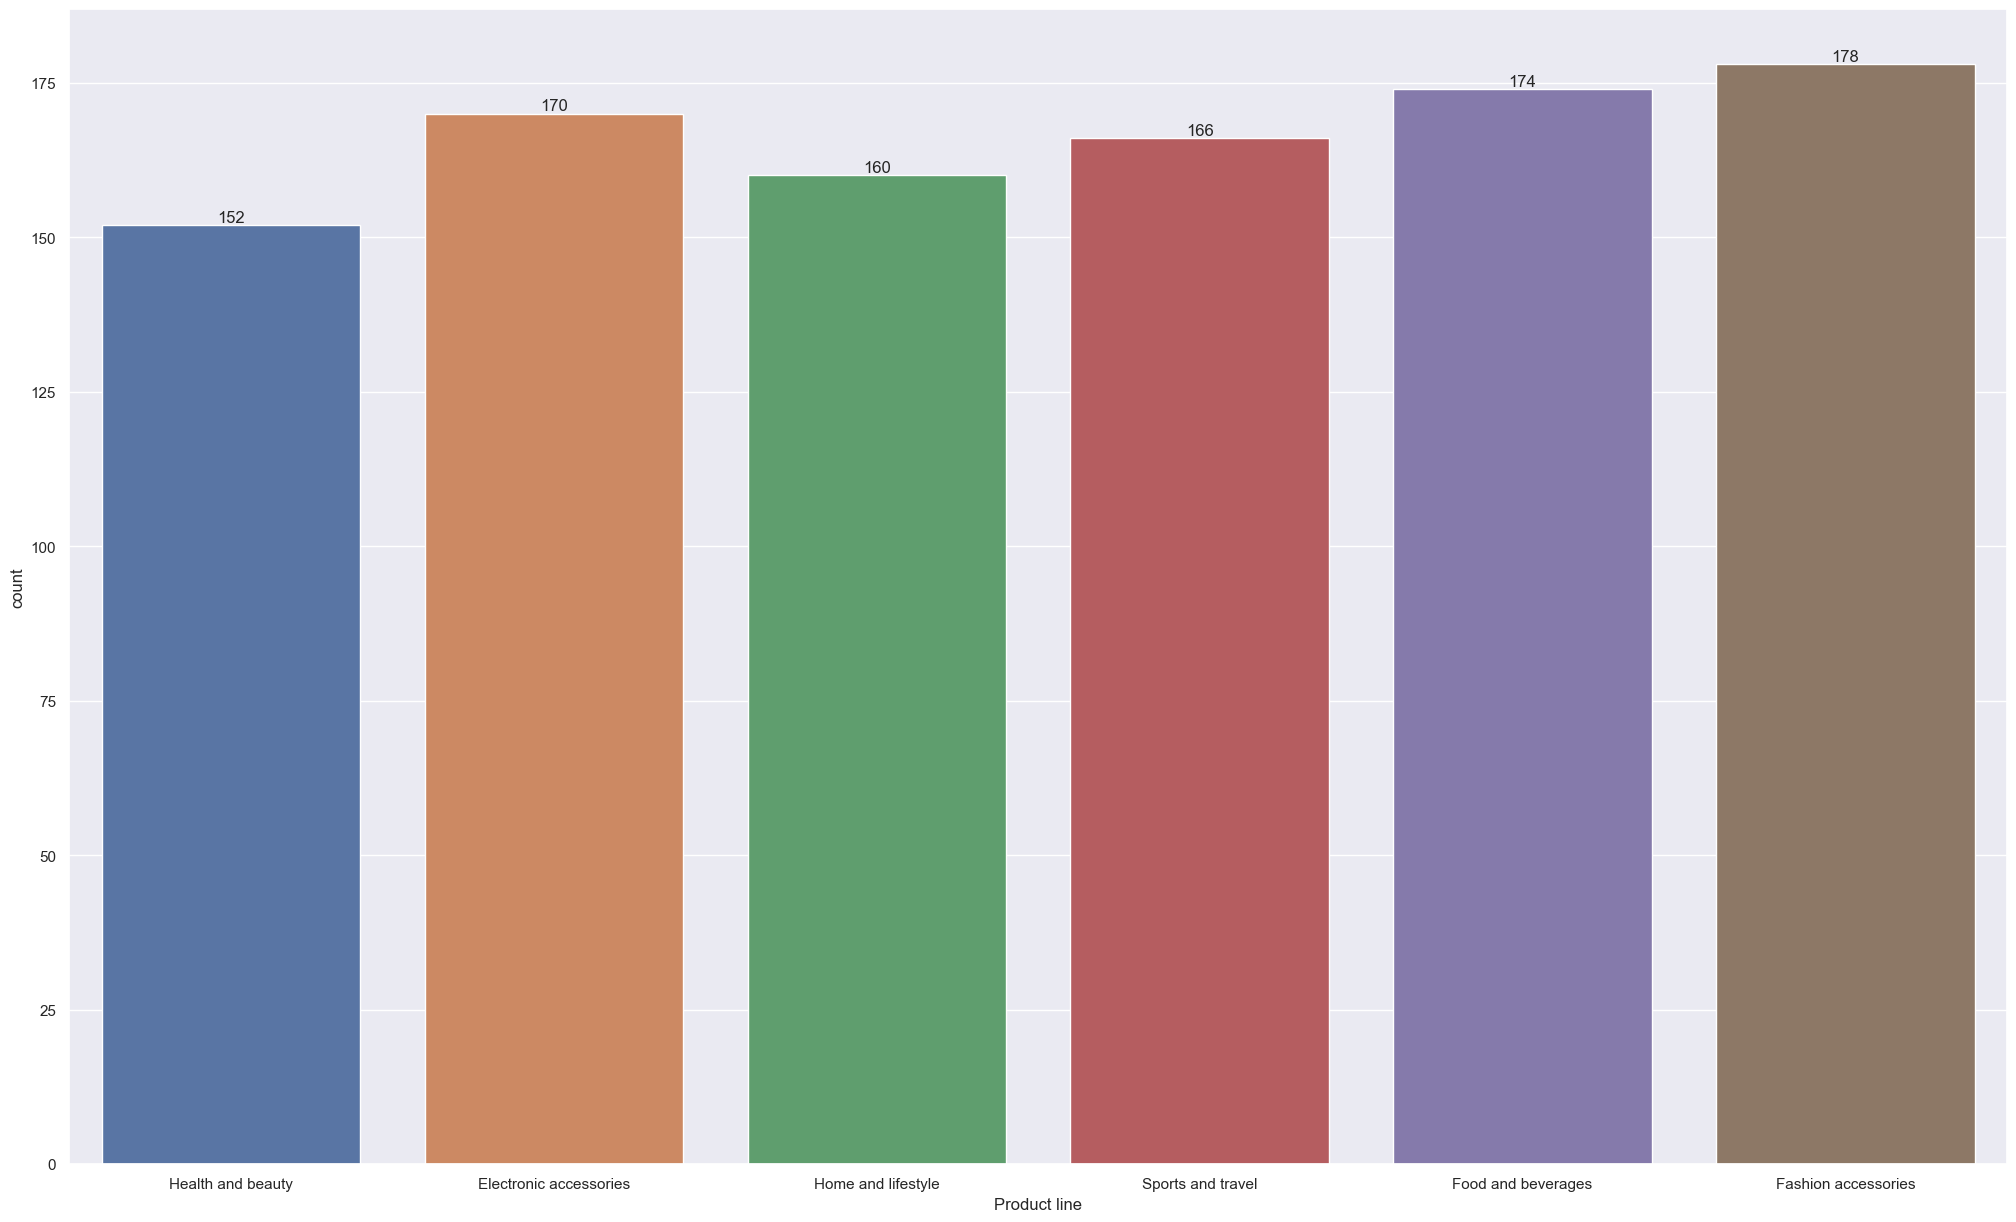

In [135]:
ax=sns.countplot(x='Product line',data =df)
sns.set(rc={'figure.figsize':(25,20)})  
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Product line', ylabel='Gross income'>

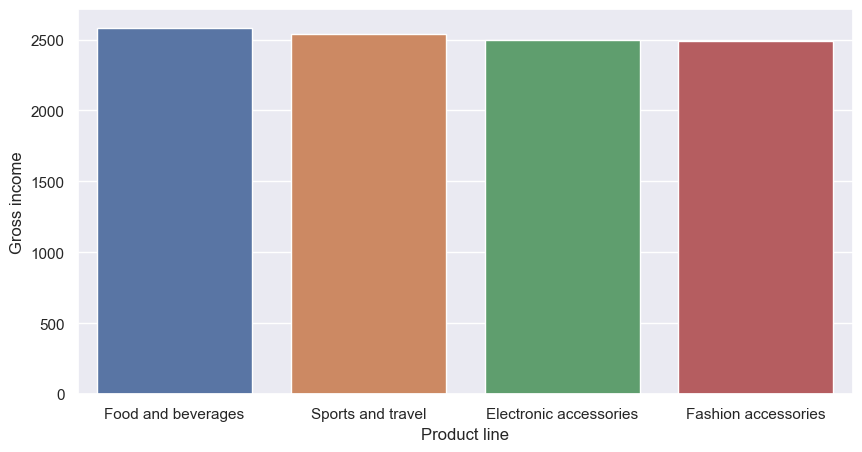

In [141]:
sales_state=df.groupby(['Product line'], as_index=False)['Gross income'].sum().sort_values(by='Gross income',ascending=False).head(4)
sns.set(rc={'figure.figsize':(10,5)})  #for more nu. of cities
sns.barplot(x='Product line',y='Gross income',data=sales_state)